In [22]:
import xarray as xr
%matplotlib inline
import matplotlib.pyplot as plt

In [12]:
!ls ../processed_data/fig-05_pictrl/concat_*

../processed_data/fig-05_pictrl/concat_cLand_Emon_CanESM5_pictrl_5200-6200.nc
../processed_data/fig-05_pictrl/concat_fgco2_Omon_CanESM5_pictrl_5200-6200.nc
../processed_data/fig-05_pictrl/concat_hfds_Omon_CanESM5_pictrl_5200-6200.nc
../processed_data/fig-05_pictrl/concat_hfls_Amon_CanESM5_pictrl_5200-6200.nc
../processed_data/fig-05_pictrl/concat_hfss_Amon_CanESM5_pictrl_5200-6200.nc
../processed_data/fig-05_pictrl/concat_nep_Emon_CanESM5_pictrl_5200-6200.nc
../processed_data/fig-05_pictrl/concat_rls_Emon_CanESM5_pictrl_5200-6200.nc
../processed_data/fig-05_pictrl/concat_rss_Emon_CanESM5_pictrl_5200-6200.nc
../processed_data/fig-05_pictrl/concat_rtmt_Amon_CanESM5_pictrl_5200-6200.nc
../processed_data/fig-05_pictrl/concat_snw_LImon_CanESM5_pictrl_5200-6200.nc
../processed_data/fig-05_pictrl/concat_tas_Amon_CanESM5_pictrl_5200-6200.nc
../processed_data/fig-05_pictrl/concat_wfo_Omon_CanESM5_pictrl_5200-6200.nc
../processed_data/fig-05_pictrl/concat_zos_Omon_CanESM5_pictrl_5200-6200.nc


In [18]:
ds = xr.open_mfdataset(['../processed_data/fig-05_pictrl/concat_rls_Emon_CanESM5_pictrl_5200-6200.nc',                        
                        '../processed_data/fig-05_pictrl/concat_rss_Emon_CanESM5_pictrl_5200-6200.nc',
                        '../processed_data/fig-05_pictrl/concat_hfls_Amon_CanESM5_pictrl_5200-6200.nc',
                         '../processed_data/fig-05_pictrl/concat_hfss_Amon_CanESM5_pictrl_5200-6200.nc',
                       ])

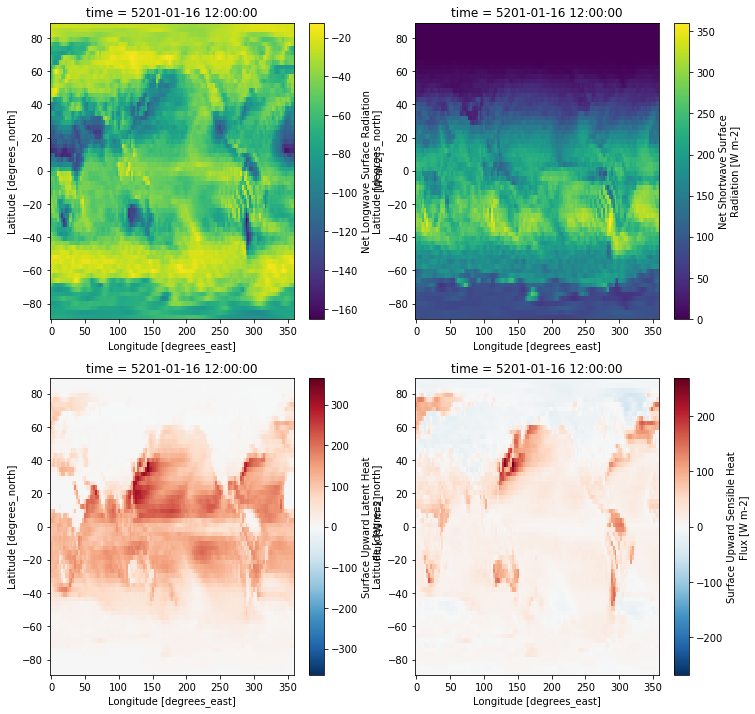

In [23]:
fig, ((axtl, axtr), (axbl, axbr)) = plt.subplots(2,2, figsize=(12,12))
ds['rls'].isel(time=0).plot(ax=axtl)
ds['rss'].isel(time=0).plot(ax=axtr)
ds['hfls'].isel(time=0).plot(ax=axbl)
ds['hfss'].isel(time=0).plot(ax=axbr)

In [61]:
CanESM5_dir = '../input_data/CanESM5_cmip_dir/piControl/r1i1p1f1/'
areacella = xr.open_dataset(CanESM5_dir + 'fx/areacella/gn/v20190429/areacella_fx_CanESM5_piControl_r1i1p1f1_gn.nc')['areacella'] #units m2
land_frac = xr.open_dataset(CanESM5_dir + 'fx/sftlf/gn/v20190429/sftlf_fx_CanESM5_piControl_r1i1p1f1_gn.nc')['sftlf'] #units %

In [31]:
irls = (ds['rls'] * areacella).sum(dim=['lat', 'lon']) / areacella.sum(dim=['lat', 'lon'])
irss = (ds['rss'] * areacella).sum(dim=['lat', 'lon']) / areacella.sum(dim=['lat', 'lon'])
ihfls = (ds['hfls'] * areacella).sum(dim=['lat', 'lon']) / areacella.sum(dim=['lat', 'lon'])
ihfss = (ds['hfss'] * areacella).sum(dim=['lat', 'lon']) / areacella.sum(dim=['lat', 'lon'])

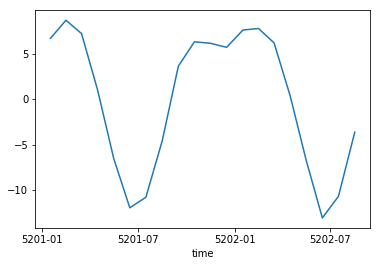

In [39]:
ndhf = (irls + irss - ihfls - ihfss)
ndhf.isel(time=slice(0,20)).plot()

In [41]:
import numpy as np
days_in_month = np.array([31,28,31,30,31,30,31,31,30,31,30,31])

In [47]:
wndhf  = ndhf * (np.tile(days_in_month, 1000)/days_in_month.sum())

In [51]:
am_ndhf = wndhf.groupby('time.year').sum(dim='time')

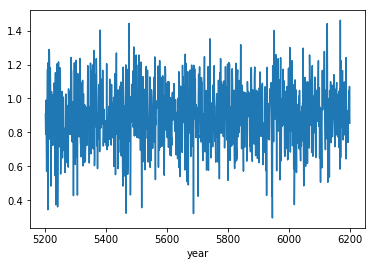

In [53]:
am_ndhf.plot()

In [60]:
am_ndhf.values.mean()*0.71

0.637655593298089

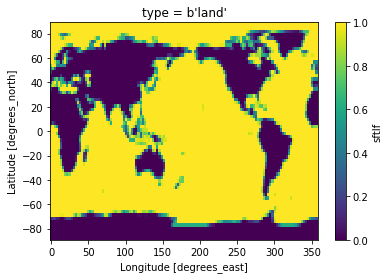

In [64]:
ofrac = (100. - land_frac)/100.
ofrac.plot()